In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_rel

In [2]:
df = pd.read_csv(
    "timings.csv",
    header=None,
    names=["run", "module", "approach", "request type", "duration (s)"],
)

In [3]:
df.groupby(by=["request type", "approach"]).agg(
    {"duration (s)": ["mean", "std", "count"]}
)

duration (s)                
                               mean       std count
request type approach                              
get_offset   dataclass     3.274322  0.050442    50
             tuple         3.277514  0.073502    50
             typeddict     3.281686  0.057133    50
get_range    dataclass     3.259594  0.077734    50
             tuple         3.260212  0.098428    50
             typeddict     3.266655  0.091269    50
get_suffix   dataclass     3.274293  0.039862    50
             tuple         3.277563  0.080995    50
             typeddict     3.284020  0.088772    50

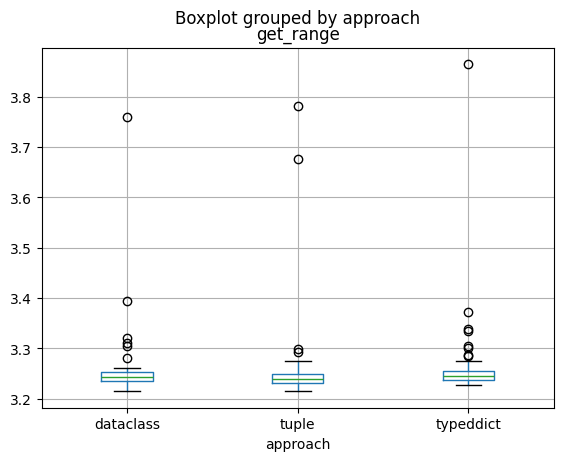

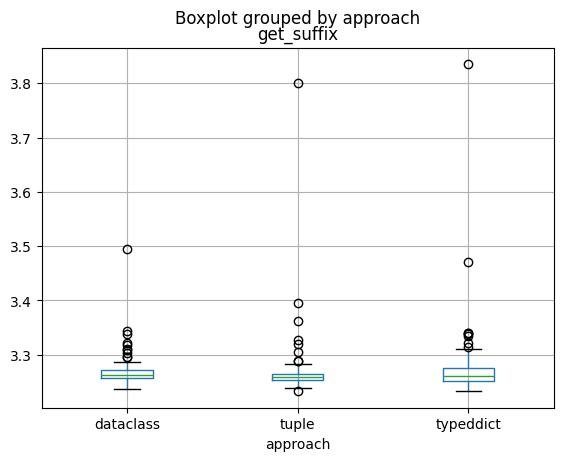

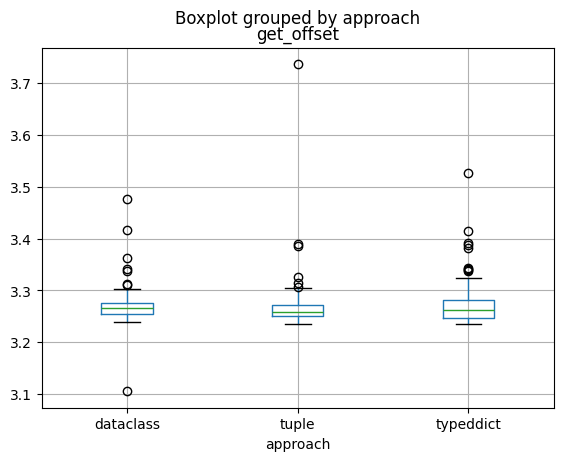

In [4]:
for method in ["get_range", "get_suffix", "get_offset"]:
    fig, ax = plt.subplots()
    df[df["request type"] == method].boxplot(
        ax=ax, column="duration (s)", by="approach"
    )
    ax.set_title(method)

In [5]:
for method in ["get_range", "get_suffix", "get_offset"]:
    print(method)
    print("Tuple <-> Dataclass")
    a = df[(df["request type"] == method) & (df["approach"] == "dataclass")][
        "duration (s)"
    ].values
    b = df[(df["request type"] == method) & (df["approach"] == "tuple")][
        "duration (s)"
    ].values
    print(ttest_rel(a, b))
    print("Tuple <-> TypedDict")
    a = df[(df["request type"] == method) & (df["approach"] == "typeddict")][
        "duration (s)"
    ].values
    b = df[(df["request type"] == method) & (df["approach"] == "tuple")][
        "duration (s)"
    ].values
    print(ttest_rel(a, b))

get_range
Tuple <-> Dataclass
TtestResult(statistic=np.float64(-0.07031293694796431), pvalue=np.float64(0.9442307705039736), df=np.int64(49))
Tuple <-> TypedDict
TtestResult(statistic=np.float64(0.638887123294002), pvalue=np.float64(0.5258716891504257), df=np.int64(49))
get_suffix
Tuple <-> Dataclass
TtestResult(statistic=np.float64(-0.3917488183941675), pvalue=np.float64(0.6969424101393423), df=np.int64(49))
Tuple <-> TypedDict
TtestResult(statistic=np.float64(0.8670598213604644), pvalue=np.float64(0.3901355236013627), df=np.int64(49))
get_offset
Tuple <-> Dataclass
TtestResult(statistic=np.float64(-0.25997362739057345), pvalue=np.float64(0.7959734139823523), df=np.int64(49))
Tuple <-> TypedDict
TtestResult(statistic=np.float64(0.3030639419896058), pvalue=np.float64(0.7631241097077714), df=np.int64(49))
